In [45]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from sympy import Eq, integrate, symbols, solve, diff, log, expand

In [50]:
# task1
def func(x):
    return np.exp(x) * np.cos(x)

# В този пример е безсмислено, тъй като са ни дадени на готово и също знаем, че сме в интервал (-1,1), тоест няма нужда от смяна
x, A1, x1, A2, x2, A3, x3 = symbols('x, A1, x1, A2, x2, A3, x3')
eq1 = Eq(A1 + A2 + A3, integrate(1,(x, -1, 1)))
eq2 = Eq(A1*x1 + A2*x2 + A3*x3, integrate(x,(x, -1, 1)))
eq3 = Eq(A1*x1**2 + A2*x2**2 + A3*x3**2, integrate(x**2,(x, -1, 1)))
eq4 = Eq(A1*x1**3 + A2*x2**3 + A3*x3**3, integrate(x**3,(x, -1, 1)))
eq5 = Eq(A1*x1**4 + A2*x2**4 + A3*x3**4, integrate(x**4,(x, -1, 1)))
eq6 = Eq(A1*x1**5 + A2*x2**5 + A3*x3**5, integrate(x**5,(x, -1, 1)))
solutions = solve([eq1, eq2, eq3, eq4, eq5, eq6])

x1_real = -np.sqrt(3 / 5)
x2_real = 0
x3_real = np.sqrt(3 / 5)

A1_real = 5 / 9
A2_real = 8 / 9
A3_real = 5 / 9

# АСТ е равно на брой "коефиценти" * 2 - 1, в случая е 2 * 3 - 1 = 5
result = A1_real * func(x1_real) + A2_real * func(x2_real) + A3_real * func(x3_real)
print(result)

1.9333904692642978


In [52]:
# task2
nodes1 = [0, pi / 4, pi / 2, 3 * pi / 4, pi]

def func(x):
    if x == 0:
        return 1.0000
    elif x == pi / 4:
        return 0.3431
    elif x == pi / 2:
        return 0.2500
    elif x == 3 * pi / 4:
        return 0.3431
    else:
        return 1.000 

def trapezoid_formula(a, b, f, nodes, n):
    result = 0

    for i in range(1, n + 1):
        result += (f(nodes[i - 1]) + f(nodes[i]))
        result *= (b - a) / (2 * n)
    return result

n = 4
result = trapezoid_formula(0, pi, func, nodes1, n)
print(result)

0.6867561882552315


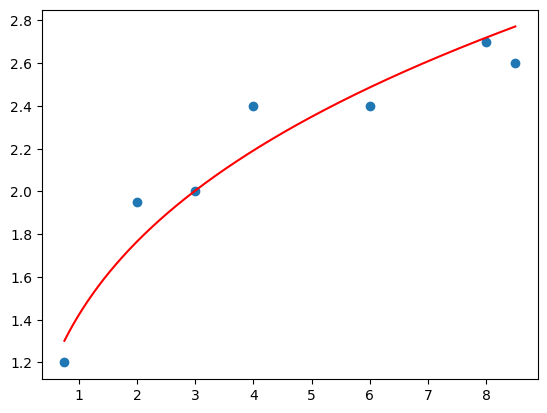

In [53]:
#task3
nodes2 = [0.75, 2, 3, 4, 6, 8, 8.5]
values = [1.2, 1.95, 2, 2.4, 2.4, 2.7, 2.6]

alfa, B = symbols("alfa B", real = True)
expression = 0

for x, y in zip(nodes2, values):
    expression += (log(y) - (alfa + B * log(x))) ** 2

def original_func(c, d, x):
    return c * x ** d

solutions = solve([Eq(diff(expression, alfa), 0), Eq(diff(expression, B), 0)], [alfa, B], dict = True)
alfa_sol = solutions[0][alfa]
B_sol = solutions[0][B]

c_sol = np.exp(float(alfa_sol))
d_sol = float(B_sol)

x_range = np.linspace(min(nodes2), max(nodes2), 1000)
plt.scatter(nodes2, values)
plt.plot(x_range, original_func(c_sol, d_sol, x_range), "red")
plt.show()